# Análisis del dataset Diamantes con Seaborn

In [23]:
import seaborn as sns
import pandas as pd 
import numpy as np 

In [24]:
#1.Cargo el dataset
dt = sns.load_dataset('diamonds')
dt

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## EDA

In [25]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [26]:
dt.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

COLUMNAS: 

*Quilate (carat): Esta medida indica el peso de un diamante. Un quilate equivale a 0,2 gramos. A mayor quilataje, generalmente mayor tamaño y valor, aunque la proporción calidad-precio puede variar.

*Corte (cut): Se refiere a la forma en que se ha tallado el diamante para maximizar su brillo y dispersión de la luz. Las calificaciones más comunes son:
Ideal: El corte más proporcional y simétrico, que produce el máximo brillo.
Premium: Un corte muy bueno, cercano al ideal.
Good: Un corte aceptable, pero con algunas imperfecciones que pueden afectar el brillo.

*Color (color): La escala de color de los diamantes va desde la D (incoloro, el más valioso) hasta la Z (amarillo claro). Los diamantes incoloros son los más raros y, por tanto, los más caros.

*Claridad (clarity): Se refiere a la pureza del diamante, es decir, a la ausencia de inclusiones internas (manchas) o imperfecciones externas (rasguños). Las calificaciones varían desde FL (sin inclusiones visibles bajo un microscopio) hasta I3 (inclusiones visibles a simple vista). En el dataset se tiene: IF(+), VVS1, VVS2, VS1, VS2, SI1, SI2, I1(-). 

*Profundidad (depth): Es la medida de la altura del diamante en relación a su diámetro. Una profundidad adecuada maximiza el brillo.

*Mesa (table): La superficie plana superior del diamante. Una mesa demasiado grande o pequeña puede afectar el brillo.

*Precio (price): El precio de un diamante depende de la interacción de las 4C's (quilate, corte, color y claridad), así como de la demanda del mercado y otros factores como la rareza de ciertas características.

*X, Y, Z: Estas medidas corresponden a las dimensiones del diamante en milímetros. La longitud (x), el ancho (y) y la altura (z) son importantes para determinar el volumen y las proporciones del diamante.

In [27]:
dt.shape

(53940, 10)

In [28]:
dt['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [29]:
dt['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [30]:
dt.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [32]:
dt.isna().sum() #No hay nulos 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Visualizaciones 

### Relaciones entre variables numéricas 

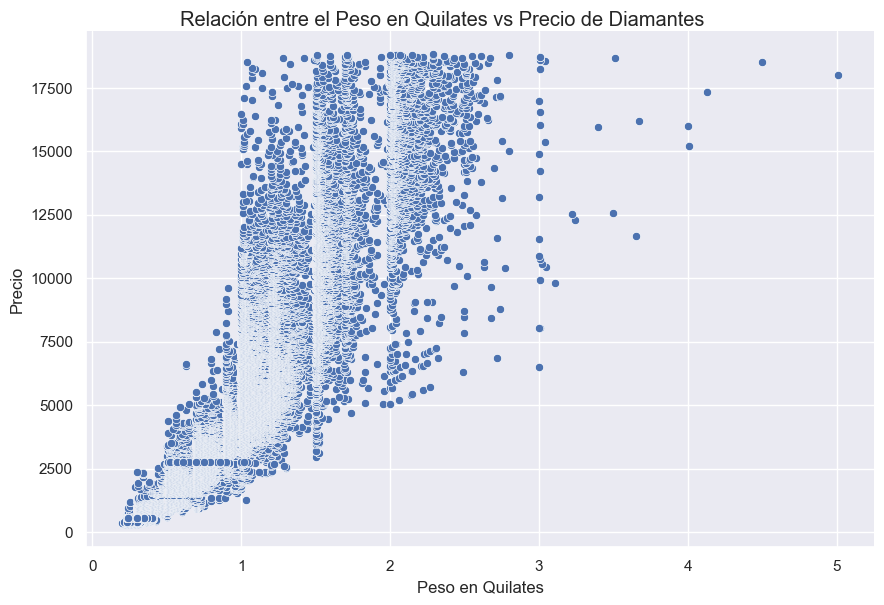

In [35]:
sns.set(style='darkgrid')

g = sns.relplot(data=dt,  
               x='carat',
               y='price',
               kind='scatter',
               height=6,
               aspect=1.5)

g.fig.suptitle('Relación entre el Peso en Quilates vs Precio de Diamantes',
              va='baseline',
              ha='center')

g.set_axis_labels('Peso en Quilates', 'Precio');

#A mayor peso más precio
#Densidades en ciertas áreas del gráfico 
#Hay un grupo minoritario que no respeta el patrón 

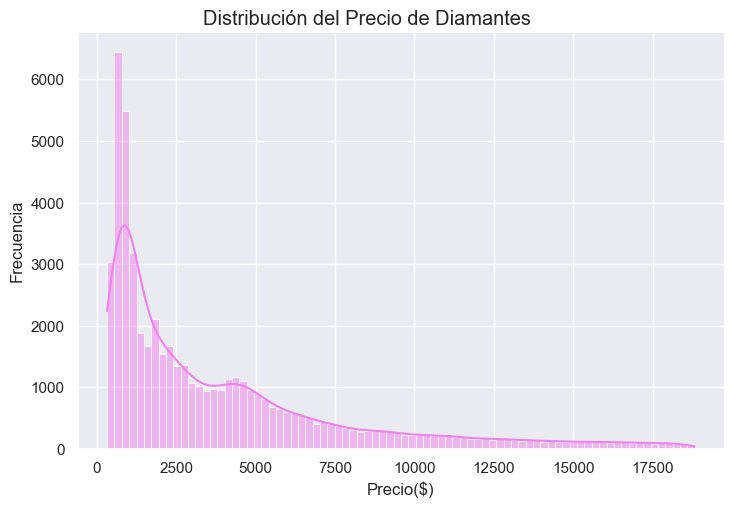

In [39]:
#Gráfico de alto nivel
g = sns.displot(data=dt, #PARA DISTRIBUCIONES
               x='price',
               kind='hist',
               kde=True,
               color='violet',
               height=5,
               aspect=1.5)

g.fig.suptitle('Distribución del Precio de Diamantes',
              va='baseline',
              ha='center')

g.set_axis_labels('Precio($)', 'Frecuencia');

#Distribución sesgada a la derecha con precios accesibles 

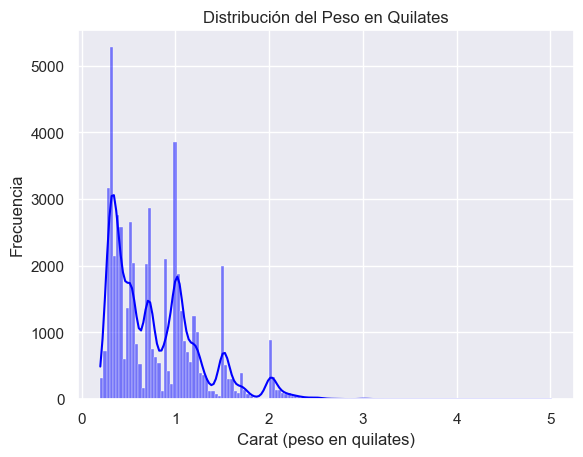

In [45]:
g = sns.histplot(data=dt, 
               x='carat',
               kde=True,
               color='blue')

g.set_title('Distribución del Peso en Quilates')

g.set(xlabel='Carat (peso en quilates)', ylabel='Frecuencia');


### Comparaciones de variables numéricas agrupadas por categoría

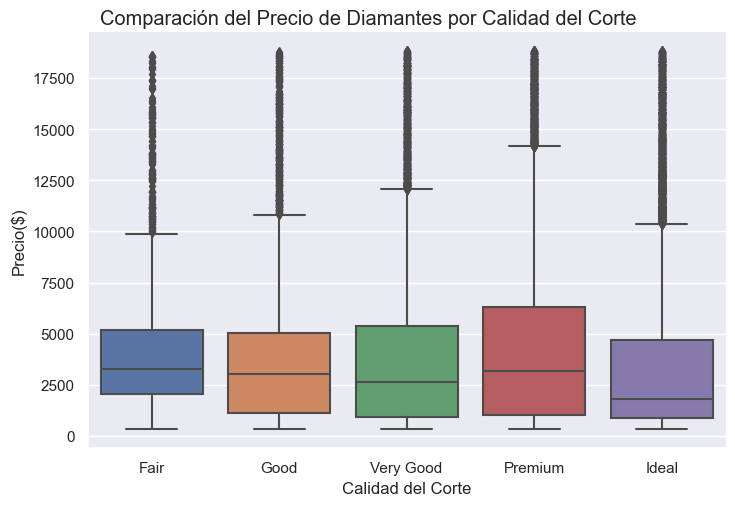

In [46]:
g = sns.catplot(data=dt, #Catplot para categorías
                x='cut',
                y='price',
               kind='box',
               height=5,
               aspect=1.5,
               order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

g.fig.suptitle('Comparación del Precio de Diamantes por Calidad del Corte',
              va='baseline',
              ha='center')

g.set_axis_labels('Calidad del Corte', 'Precio($)');

### Usar jointplot() para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional.

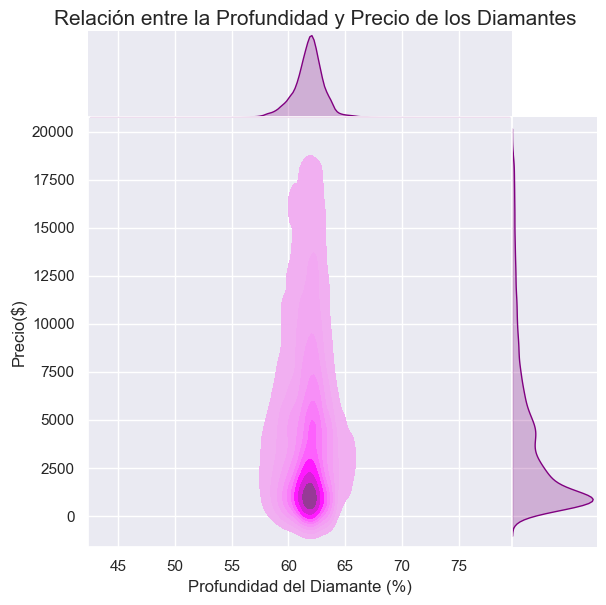

In [50]:
g = sns.jointplot(data=dt, 
               x='depth',
               y='price',
               kind='kde',
               fill=True,
               space=0,
               color='purple')

g.fig.suptitle('Relación entre la Profundidad y Precio de los Diamantes',
              va='baseline',
              ha='center',
              fontsize=15)

g.set_axis_labels('Profundidad del Diamante (%)', 'Precio($)');

### Usar pairplot() para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta 

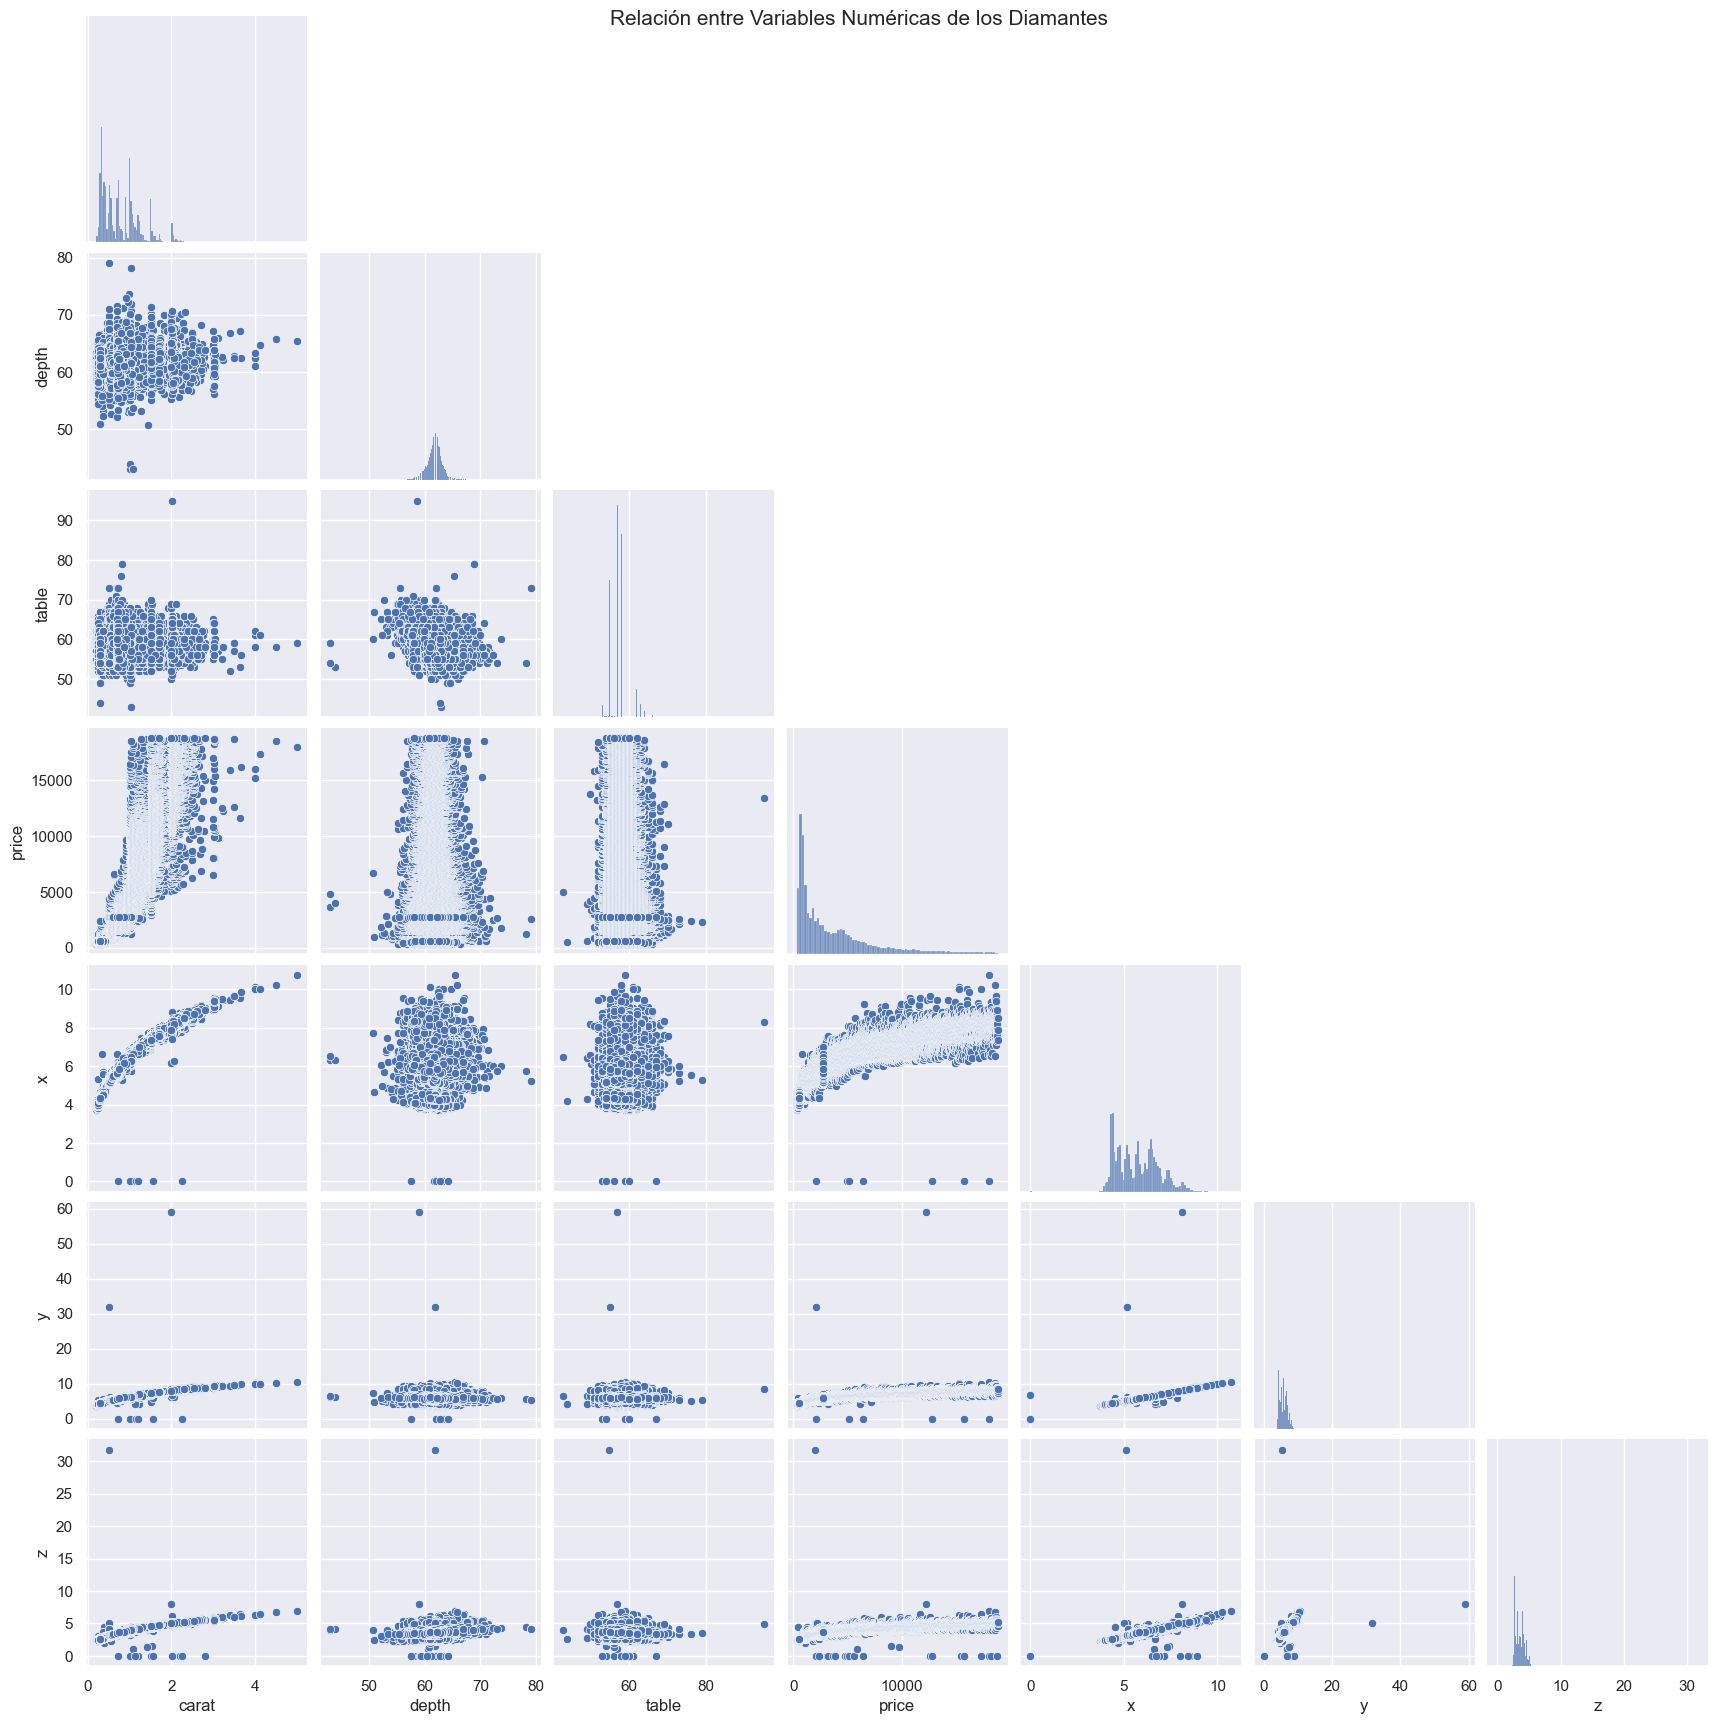

In [52]:
g = sns.pairplot(dt,
                corner=True)

g.fig.suptitle('Relación entre Variables Numéricas de los Diamantes',
              va='baseline',
              ha='center',
              fontsize=15);